In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.calibration import calibration_curve
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import os
import psutil

def log_memory_usage():
    pid = os.getpid()
    process = psutil.Process(pid)
    info = process.memory_info()
    print('Process has used {:,d} bytes of memory'.format(info.rss))

print("Before loading data")
log_memory_usage()

Before loading data
Process has used 110,329,856 bytes of memory


In [3]:
dtrn = pd.read_csv('/Users/laavanyaganesh/Desktop/cup98LRN.csv',low_memory=False)
dtst = pd.read_csv('/Users/laavanyaganesh/Desktop/cup98VAL.csv',low_memory=False)
dtst_target = pd.read_csv('/Users/laavanyaganesh/Desktop/valtargt.txt',low_memory=False)

In [4]:
dtrn.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [5]:
dtst.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9301,PV3,0,WI,53558,,,1702,0,X,...,188946,1,L,1,G,X,X,X,15.0,B
1,9501,CNT,0,TX,78501,,,1501,0,,...,126296,1,L,1,F,X,X,X,13.0,B
2,9101,L01,1,CA,92392,,,3001,0,,...,155244,1,L,1,G,X,X,X,34.0,A
3,9401,HAM,0,TX,77625-,,,4909,0,,...,123985,0,L,1,F,X,X,X,58.0,B
4,9201,NAS,2,TX,76051,,,5406,0,,...,119118,1,L,3,E,X,X,X,2.0,A


In [6]:
dtst_target.head()

,CONTROLN,TARGET_B,TARGET_D
0,3,0,0.0
1,6,0,0.0
2,9,0,0.0
3,11,0,0.0
4,16,0,0.0


In [7]:
print("After loading data")
log_memory_usage()

After loading data
Process has used 860,897,280 bytes of memory


In [130]:

def what_is(df):
    """Show summary stats of a data frame"""
    ret = []
    for col, dtype in zip(df.columns, df.dtypes):
        if np.issubdtype(dtype, np.number):
            col_values = df[col]
            val_max = col_values.max()
            val_min = col_values.min()
            val_mean = col_values.mean()
            val_median = col_values.median()
            unique_count = len(col_values.unique())
            na_count = np.isnan(col_values).sum()
            non_na_count = len(df) - na_count
        elif np.issubdtype(dtype, np.object):
            col_values = df[col].fillna('')
            val_max = col_values.max()
            val_min = col_values.min()
            val_mean = ''
            val_median = ''
            unique_count = len(col_values.unique())
            na_count = (col_values == '').sum()
            non_na_count = len(df) - na_count
        else:
            val_max = None
            val_min = None
            val_mean = None
            val_median = None
            unique_count = None
            na_count = None
            non_na_count = None
        row = (col, dtype, na_count, non_na_count, unique_count, val_min, val_max, val_median, val_mean)
        ret.append(row)
    summary = pd.DataFrame(ret, columns=['column', 'dtype', 'na_count', 'non_na_count', 'unique_count',
                                         'val_min', 'val_max', 'val_median', 'val_mean'])
    return summary

def print_full(df, max_rows=1000, max_columns=1000, width=1000):
    """Print a data frame in full"""
    with pd.option_context('display.max_rows', max_rows,
                           'display.max_columns', max_columns,
                           'display.width', width):
        print(df)

summary = what_is(dtrn)
summary.pipe(print_full)

       column    dtype  na_count  non_na_count  unique_count  val_min val_max val_median    val_mean
0     ODATEDW    int64         0         95412            54     8306    9701       9201     9141.36
1     OSOURCE   object         0         95412           896              ZOY                       
2       TCODE    int64         0         95412            55        0   72002          1     54.2231
3       STATE   object         0         95412            57       AA      WY                       
4         ZIP   object         0         95412         19938    00801   99950                       
5    MAILCODE   object         0         95412             2                B                       
6    PVASTATE   object         0         95412             3                P                       
7         DOB    int64         0         95412           947        0    9710       2610      2723.6
8      NOEXCH   object         0         95412             4                X              

In [9]:
print(dtrn.shape)
print(dtst.shape)
set(dtrn.columns).difference(dtst.columns)

(95412, 481)
(96367, 479)


{'TARGET_B', 'TARGET_D'}

In [10]:
what_is(dtst_target).pipe(print_full)

     column    dtype  na_count  non_na_count  unique_count  val_min   val_max  val_median      val_mean
0  CONTROLN    int64         0         96367         96367      3.0  191776.0     96125.0  96000.714871
1  TARGET_B    int64         0         96367             2      0.0       1.0         0.0      0.050567
2  TARGET_D  float64         0         96367            74      0.0     500.0         0.0      0.789582


In [11]:
dtst = pd.merge(dtst, dtst_target, on='CONTROLN')

In [12]:
amount_cols = [col for col in dtrn.columns if col.startswith('RAMNT_')]
other_cols_to_use = ['AVGGIFT', 'LASTGIFT', 'NGIFTALL', 'NUMPROM','AGE', 'INCOME', 'GENDER']
target_cols = ['TARGET_B', 'TARGET_D']


print("train data:")
what_is(dtrn[other_cols_to_use + amount_cols + target_cols]).pipe(print_full)

print()
print("validation data:")
what_is(dtst[other_cols_to_use + amount_cols + target_cols]).pipe(print_full)

train data:
      column    dtype  na_count  non_na_count  unique_count   val_min  val_max  val_median   val_mean
0    AVGGIFT  float64         0         95412          7713  1.285714   1000.0   11.636364  13.347786
1   LASTGIFT  float64         0         95412           231  0.000000   1000.0   15.000000  17.313127
2   NGIFTALL    int64         0         95412            89  1.000000    237.0    7.000000   9.602031
3    NUMPROM    int64         0         95412           165  4.000000    195.0   47.000000  46.973347
4    RAMNT_3  float64     95170           242            30  2.000000     50.0   10.000000  12.221074
5    RAMNT_4  float64     95131           281            33  1.000000    100.0   10.000000  14.540107
6    RAMNT_5  float64     95403             9            10  4.000000     50.0   12.000000  17.000000
7    RAMNT_6  float64     94636           776            41  1.000000    100.0   12.000000  14.356920
8    RAMNT_7  float64     86517          8895            76  1.000000 

In [131]:
def featurize(df):
    amount_cols = [col for col in df.columns if col.startswith('RAMNT_')]
    ret = pd.concat([
        df['AVGGIFT'],
        df['LASTGIFT'],
        df['NGIFTALL']/df['NUMPROM'],
        # We generate another feature by averaging all RAMNT_ columns
        df[amount_cols].mean(axis=1, skipna=True).fillna(0),
        df['AGE'].fillna(0),
        df['INCOME'].fillna(0),
        df['WEALTH1'].fillna(0),
        df['POP902'].fillna(0),
        df['POP903'].fillna(0)
    ], axis=1)
    ret.columns = ['avggift', 'lastgift', 'pgift', 'ampergift', 'AGE', 'INCOME', 'WEALTH1', 'POP902', 'POP903']
    return ret

trn_x = featurize(dtrn)
val_x = featurize(dtst)

print("train data summary:")
what_is(trn_x).pipe(print_full)
print()
print("validation data summary:")
what_is(val_x).pipe(print_full)

train data summary:
      column    dtype  na_count  non_na_count  unique_count   val_min       val_max  val_median     val_mean
0    avggift  float64         0         95412          7713  1.285714   1000.000000   11.636364    13.347786
1   lastgift  float64         0         95412           231  0.000000   1000.000000   15.000000    17.313127
2      pgift  float64         0         95412          2277  0.025000      1.768657    0.157895     0.179621
3  ampergift  float64         0         95412          1469  0.000000   1000.000000   15.000000    15.993879
4        AGE  float64         0         95412            97  0.000000     98.000000   52.000000    46.330137
5     INCOME  float64         0         95412             8  0.000000      7.000000    3.000000     3.019243
6    WEALTH1  float64         0         95412            10  0.000000      9.000000    1.000000     2.839475
7     POP902    int64         0         95412          4786  0.000000  23766.000000  421.000000   864.993083

In [132]:
trn_x.head()

,avggift,lastgift,pgift,ampergift,AGE,INCOME,WEALTH1,POP902,POP903
0,7.741935,10.0,0.418919,10.428571,60.0,0.0,0.0,264,332
1,15.666667,25.0,0.093750,18.500000,46.0,6.0,9.0,940,998
2,7.481481,5.0,0.428571,8.285714,0.0,3.0,1.0,2040,2669
3,6.812500,10.0,0.242424,9.285714,70.0,1.0,4.0,160,219
4,6.864865,15.0,0.327434,12.500000,78.0,3.0,2.0,627,761


In [133]:
val_x.head()

,avggift,lastgift,pgift,ampergift,AGE,INCOME,WEALTH1,POP902,POP903
0,15.333333,15.0,0.142857,26.5,81.0,1.0,9.0,599,747
1,15.000000,20.0,0.095238,15.0,83.0,2.0,8.0,158,207
2,24.444444,25.0,0.147541,0.0,68.0,1.0,3.0,968,1399
3,13.666667,19.0,0.093750,18.0,48.0,0.0,0.0,1390,1721
4,5.750000,10.0,0.170213,6.6,44.0,7.0,9.0,1774,1915


# Applying Logistic Regression Classifier

On training data
AUC = 0.5916


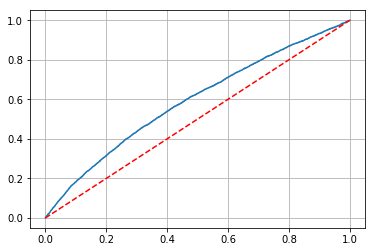

On testing data
AUC = 0.5896


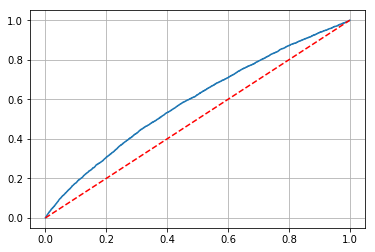

In [134]:
# TARGET_B represents whether someone has donated or not
from sklearn.linear_model import LogisticRegression 

trn_y = dtrn['TARGET_B']
val_y = dtst['TARGET_B']

m = LogisticRegression()
m.fit(trn_x, trn_y)

def plot_auc(target, pred):
    fpr, tpr, _ = roc_curve(y_true=target, y_score=pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.grid()
    print('AUC = {:.4f}'.format(auc(fpr, tpr)))
    plt.show()

print("On training data")
pred = m.predict_proba(trn_x)[:,1]
target = trn_y
plot_auc(target=target, pred=pred)

print("On testing data")
pred = m.predict_proba(val_x)[:,1]
target = val_y
plot_auc(target=target, pred=pred)

# save the prediction for later use
pred_response_prob_lr = m.predict_proba(val_x)[:,1]


in training data, found 4843.0 samples with positive donation amount
in validation data, found 4873.0 samples with positive donation amount
On training data
R-squared: 0.549


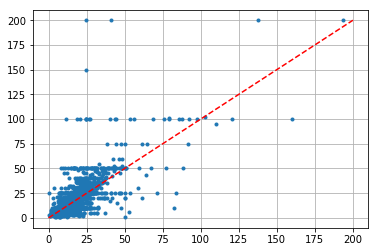

On testing data
R-squared: 0.668


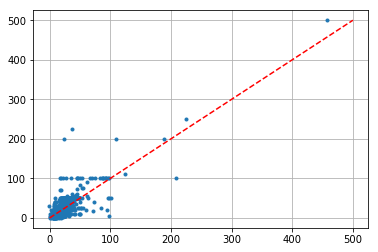

In [135]:
import math

from sklearn.linear_model import LinearRegression

idx = dtrn['TARGET_D'] > 0
print("in training data, found {} samples with positive donation amount".format(math.fsum(idx)))
trn_x_amount = trn_x.loc[idx]
trn_y_amount = dtrn.loc[idx, 'TARGET_D']

idx = dtst['TARGET_D'] > 0
print("in validation data, found {} samples with positive donation amount".format(math.fsum(idx)))
val_x_amount = val_x.loc[idx]
val_y_amount = dtst.loc[idx, 'TARGET_D']

m = LinearRegression()
m.fit(trn_x_amount, trn_y_amount)

def plot_rsquared(target, pred):
    print('R-squared: {:.3f}'.format(r2_score(y_true=target, y_pred=pred)))
    plt.plot(pred, target, '.')
    plt.grid()
    y_max = max(pred.max(), target.max())
    plt.plot([0, y_max], [0, y_max], 'r--')
    plt.show()

print("On training data")
pred = m.predict(trn_x_amount)
target = trn_y_amount
plot_rsquared(target=target, pred=pred)

print("On testing data")
pred = m.predict(val_x_amount)
target = val_y_amount
plot_rsquared(target=target, pred=pred)

# save the amount prediction for later use
pred_amount = m.predict(val_x)

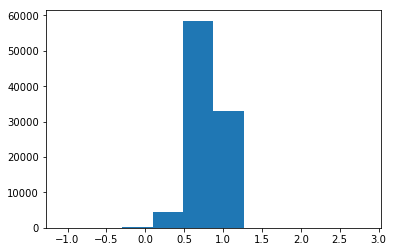

In [136]:
expected_donation_lr = pred_amount * pred_response_prob_lr
plt.hist(expected_donation_lr)
plt.show()

In [137]:
actual_donation = dtst['TARGET_D']

In [138]:
cost_per_mail = 0.68
idx = expected_donation_lr > cost_per_mail
print('Total net donation: {:.2f}'.format(np.sum(actual_donation[idx] - cost_per_mail)))

Total net donation: 9252.81


In [139]:
print('Total net donation (mail every one): {:.2f}'.format(np.sum(actual_donation - cost_per_mail)))

Total net donation (mail every one): 10560.08


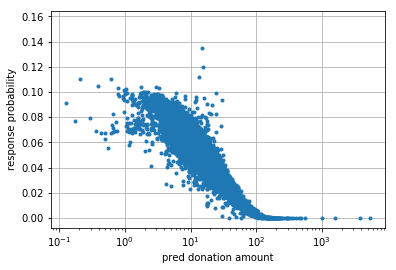

In [140]:
plt.plot(pred_amount, pred_response_prob_lr, '.')
plt.xlabel('pred donation amount')
plt.ylabel('response probability')
plt.xscale('log')
plt.grid()
plt.show()

# Applying Decision Trees classifier - CART

On training data
AUC = 1.0000


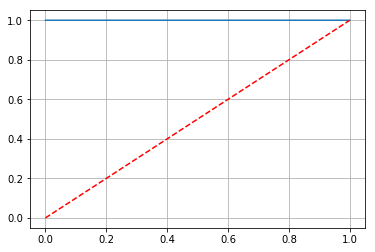

On testing data
AUC = 0.5038


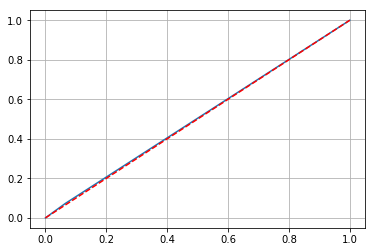

In [141]:
from sklearn import tree

trn_y = dtrn['TARGET_B']
val_y = dtst['TARGET_B']

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(trn_x, trn_y)

def plot_auc(target, pred):
    fpr, tpr, _ = roc_curve(y_true=target, y_score=pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.grid()
    print('AUC = {:.4f}'.format(auc(fpr, tpr)))
    plt.show()

print("On training data")
pred = dt_clf.predict_proba(trn_x)[:,1]
target = trn_y
plot_auc(target=target, pred=pred)

print("On testing data")
pred = dt_clf.predict_proba(val_x)[:,1]
target = val_y
plot_auc(target=target, pred=pred)

# save the prediction for later use
pred_response_prob_dt = dt_clf.predict_proba(val_x)[:,1]

in training data, found 4843.0 samples with positive donation amount
in validation data, found 4873.0 samples with positive donation amount
On training data
R-squared: 0.549


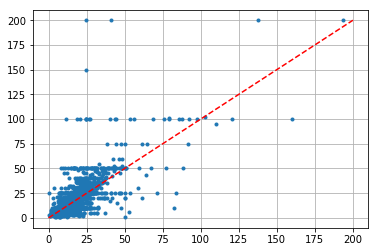

On testing data
R-squared: 0.668


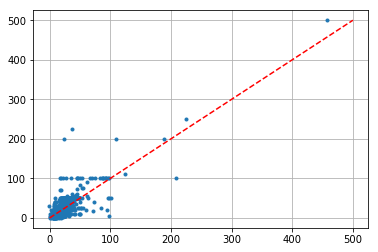

In [142]:
import math

from sklearn.linear_model import LinearRegression

idx = dtrn['TARGET_D'] > 0
print("in training data, found {} samples with positive donation amount".format(math.fsum(idx)))
trn_x_amount = trn_x.loc[idx]
trn_y_amount = dtrn.loc[idx, 'TARGET_D']

idx = dtst['TARGET_D'] > 0
print("in validation data, found {} samples with positive donation amount".format(math.fsum(idx)))
val_x_amount = val_x.loc[idx]
val_y_amount = dtst.loc[idx, 'TARGET_D']

m = LinearRegression()
m.fit(trn_x_amount, trn_y_amount)

def plot_rsquared(target, pred):
    print('R-squared: {:.3f}'.format(r2_score(y_true=target, y_pred=pred)))
    plt.plot(pred, target, '.')
    plt.grid()
    y_max = max(pred.max(), target.max())
    plt.plot([0, y_max], [0, y_max], 'r--')
    plt.show()

print("On training data")
pred = m.predict(trn_x_amount)
target = trn_y_amount
plot_rsquared(target=target, pred=pred)

print("On testing data")
pred = m.predict(val_x_amount)
target = val_y_amount
plot_rsquared(target=target, pred=pred)

# save the amount prediction for later use
pred_amount = m.predict(val_x)

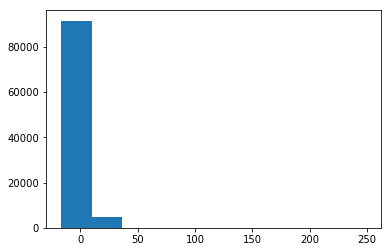

In [143]:
expected_donation_dt = pred_amount * pred_response_prob_dt
plt.hist(expected_donation_dt)
plt.show()

In [144]:
actual_donation = dtst['TARGET_D']

In [145]:
cost_per_mail = 0.68
idx = expected_donation_dt > cost_per_mail
print('Total net donation: {:.2f}'.format(np.sum(actual_donation[idx] - cost_per_mail)))

Total net donation: 1010.31


In [146]:
print('Total net donation (mail every one): {:.2f}'.format(np.sum(actual_donation - cost_per_mail)))

Total net donation (mail every one): 10560.08


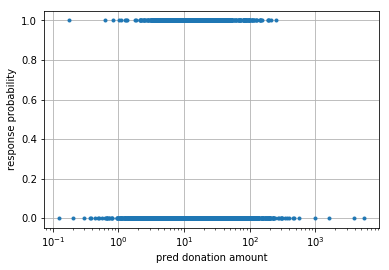

In [147]:
plt.plot(pred_amount, pred_response_prob_dt, '.')
plt.xlabel('pred donation amount')
plt.ylabel('response probability')
plt.xscale('log')
plt.grid()
plt.show()

# Applying Naive Bayes Classifier

On training data
AUC = 0.5898


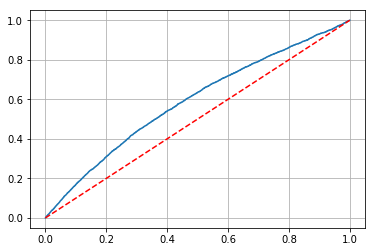

On testing data
AUC = 0.5874


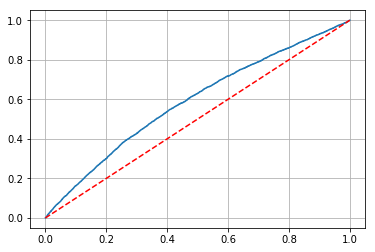

In [148]:
from sklearn.naive_bayes import GaussianNB

trn_y = dtrn['TARGET_B']
val_y = dtst['TARGET_B']

nb = GaussianNB()
nb.fit(trn_x, trn_y)

def plot_auc(target, pred):
    fpr, tpr, _ = roc_curve(y_true=target, y_score=pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.grid()
    print('AUC = {:.4f}'.format(auc(fpr, tpr)))
    plt.show()

print("On training data")
pred = nb.predict_proba(trn_x)[:,1]
target = trn_y
plot_auc(target=target, pred=pred)

print("On testing data")
pred = nb.predict_proba(val_x)[:,1]
target = val_y
plot_auc(target=target, pred=pred)

# save the prediction for later use
pred_response_prob_nb = nb.predict_proba(val_x)[:,1]

in training data, found 4843.0 samples with positive donation amount
in validation data, found 4873.0 samples with positive donation amount
On training data
R-squared: 0.549


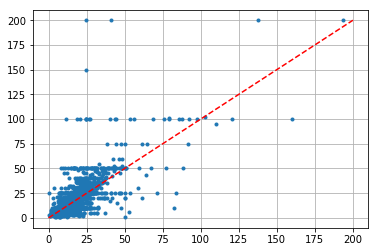

On testing data
R-squared: 0.668


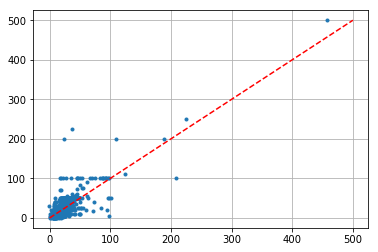

In [149]:
import math

from sklearn.linear_model import LinearRegression

idx = dtrn['TARGET_D'] > 0
print("in training data, found {} samples with positive donation amount".format(math.fsum(idx)))
trn_x_amount = trn_x.loc[idx]
trn_y_amount = dtrn.loc[idx, 'TARGET_D']

idx = dtst['TARGET_D'] > 0
print("in validation data, found {} samples with positive donation amount".format(math.fsum(idx)))
val_x_amount = val_x.loc[idx]
val_y_amount = dtst.loc[idx, 'TARGET_D']

m = LinearRegression()
m.fit(trn_x_amount, trn_y_amount)

def plot_rsquared(target, pred):
    print('R-squared: {:.3f}'.format(r2_score(y_true=target, y_pred=pred)))
    plt.plot(pred, target, '.')
    plt.grid()
    y_max = max(pred.max(), target.max())
    plt.plot([0, y_max], [0, y_max], 'r--')
    plt.show()

print("On training data")
pred = m.predict(trn_x_amount)
target = trn_y_amount
plot_rsquared(target=target, pred=pred)

print("On testing data")
pred = m.predict(val_x_amount)
target = val_y_amount
plot_rsquared(target=target, pred=pred)

# save the amount prediction for later use
pred_amount = m.predict(val_x)

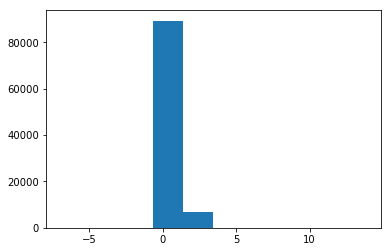

In [150]:
expected_donation_nb = pred_amount * pred_response_prob_nb
plt.hist(expected_donation_nb)
plt.show()

In [151]:
actual_donation = dtst['TARGET_D']

In [152]:
cost_per_mail = 0.68
idx = expected_donation_nb > cost_per_mail
print('Total net donation: {:.2f}'.format(np.sum(actual_donation[idx] - cost_per_mail)))

Total net donation: 5977.37


In [153]:
print('Total net donation (mail every one): {:.2f}'.format(np.sum(actual_donation - cost_per_mail)))

Total net donation (mail every one): 10560.08


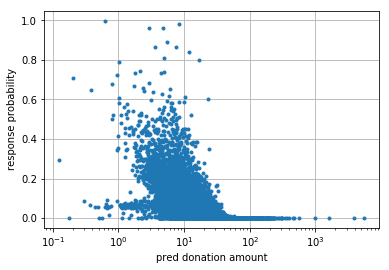

In [154]:
plt.plot(pred_amount, pred_response_prob_nb, '.')
plt.xlabel('pred donation amount')
plt.ylabel('response probability')
plt.xscale('log')
plt.grid()
plt.show()

# Applying Random Forest Classifier

On training data
AUC = 0.9999


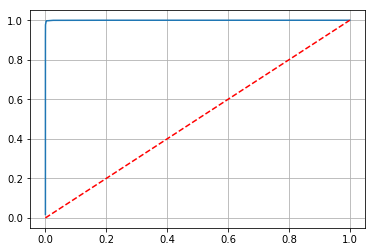

On testing data
AUC = 0.5228


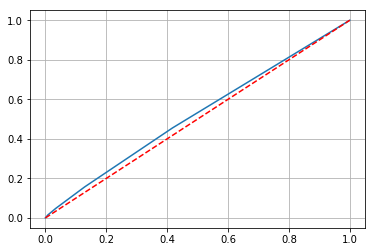

In [155]:
from sklearn.ensemble import RandomForestClassifier

trn_y = dtrn['TARGET_B']
val_y = dtst['TARGET_B']

rf = RandomForestClassifier()
rf.fit(trn_x, trn_y)

def plot_auc(target, pred):
    fpr, tpr, _ = roc_curve(y_true=target, y_score=pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.grid()
    print('AUC = {:.4f}'.format(auc(fpr, tpr)))
    plt.show()

print("On training data")
pred = rf.predict_proba(trn_x)[:,1]
target = trn_y
plot_auc(target=target, pred=pred)

print("On testing data")
pred = rf.predict_proba(val_x)[:,1]
target = val_y
plot_auc(target=target, pred=pred)

# save the prediction for later use
pred_response_prob_rf = rf.predict_proba(val_x)[:,1]

in training data, found 4843.0 samples with positive donation amount
in validation data, found 4873.0 samples with positive donation amount
On training data
R-squared: 0.549


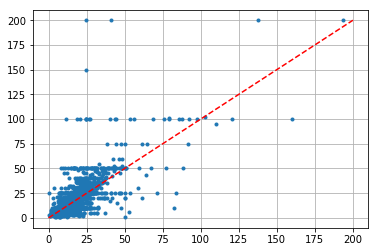

On testing data
R-squared: 0.668


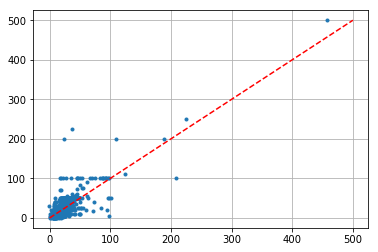

In [156]:
import math

from sklearn.linear_model import LinearRegression

idx = dtrn['TARGET_D'] > 0
print("in training data, found {} samples with positive donation amount".format(math.fsum(idx)))
trn_x_amount = trn_x.loc[idx]
trn_y_amount = dtrn.loc[idx, 'TARGET_D']

idx = dtst['TARGET_D'] > 0
print("in validation data, found {} samples with positive donation amount".format(math.fsum(idx)))
val_x_amount = val_x.loc[idx]
val_y_amount = dtst.loc[idx, 'TARGET_D']

m = LinearRegression()
m.fit(trn_x_amount, trn_y_amount)

def plot_rsquared(target, pred):
    print('R-squared: {:.3f}'.format(r2_score(y_true=target, y_pred=pred)))
    plt.plot(pred, target, '.')
    plt.grid()
    y_max = max(pred.max(), target.max())
    plt.plot([0, y_max], [0, y_max], 'r--')
    plt.show()

print("On training data")
pred = m.predict(trn_x_amount)
target = trn_y_amount
plot_rsquared(target=target, pred=pred)

print("On testing data")
pred = m.predict(val_x_amount)
target = val_y_amount
plot_rsquared(target=target, pred=pred)

# save the amount prediction for later use
pred_amount = m.predict(val_x)

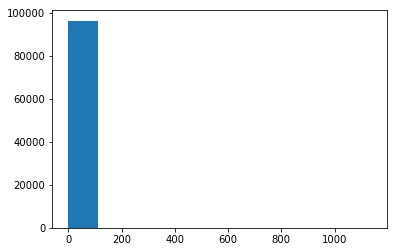

In [157]:
expected_donation_rf = pred_amount * pred_response_prob_rf
plt.hist(expected_donation_rf)
plt.show()

In [158]:
actual_donation = dtst['TARGET_D']

In [159]:
cost_per_mail = 0.68
idx = expected_donation_rf > cost_per_mail
print('Total net donation: {:.2f}'.format(np.sum(actual_donation[idx] - cost_per_mail)))

Total net donation: 4963.58


In [160]:
print('Total net donation (mail every one): {:.2f}'.format(np.sum(actual_donation - cost_per_mail)))

Total net donation (mail every one): 10560.08


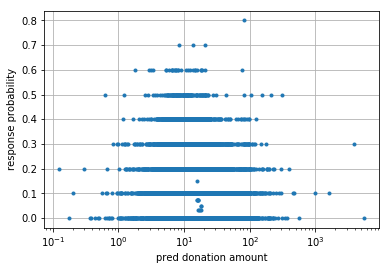

In [161]:
plt.plot(pred_amount, pred_response_prob_rf, '.')
plt.xlabel('pred donation amount')
plt.ylabel('response probability')
plt.xscale('log')
plt.grid()
plt.show()

# Applying Gradient Boosted Trees Classifier - Best Model

On training data
AUC = 0.6381


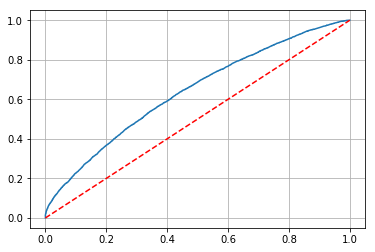

On testing data
AUC = 0.6078


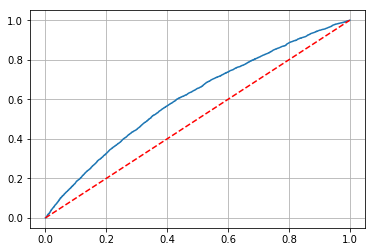

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

trn_y = dtrn['TARGET_B']
val_y = dtst['TARGET_B']

gb = GradientBoostingClassifier()
gb.fit(trn_x, trn_y)

def plot_auc(target, pred):
    fpr, tpr, _ = roc_curve(y_true=target, y_score=pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.grid()
    print('AUC = {:.4f}'.format(auc(fpr, tpr)))
    plt.show()

print("On training data")
pred = gb.predict_proba(trn_x)[:,1]
target = trn_y
plot_auc(target=target, pred=pred)

print("On testing data")
pred = gb.predict_proba(val_x)[:,1]
target = val_y
plot_auc(target=target, pred=pred)

# save the prediction for later use
pred_response_prob_gb = gb.predict_proba(val_x)[:,1]

in training data, found 4843.0 samples with positive donation amount
in validation data, found 4873.0 samples with positive donation amount
On training data
R-squared: 0.549


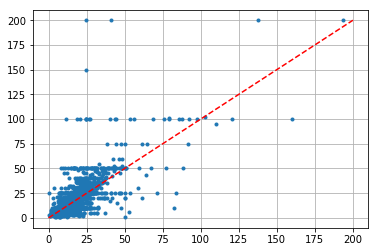

On testing data
R-squared: 0.668


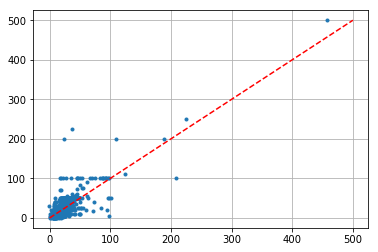

In [163]:
import math

from sklearn.linear_model import LinearRegression

idx = dtrn['TARGET_D'] > 0
print("in training data, found {} samples with positive donation amount".format(math.fsum(idx)))
trn_x_amount = trn_x.loc[idx]
trn_y_amount = dtrn.loc[idx, 'TARGET_D']

idx = dtst['TARGET_D'] > 0
print("in validation data, found {} samples with positive donation amount".format(math.fsum(idx)))
val_x_amount = val_x.loc[idx]
val_y_amount = dtst.loc[idx, 'TARGET_D']

m = LinearRegression()
m.fit(trn_x_amount, trn_y_amount)

def plot_rsquared(target, pred):
    print('R-squared: {:.3f}'.format(r2_score(y_true=target, y_pred=pred)))
    plt.plot(pred, target, '.')
    plt.grid()
    y_max = max(pred.max(), target.max())
    plt.plot([0, y_max], [0, y_max], 'r--')
    plt.show()

print("On training data")
pred = m.predict(trn_x_amount)
target = trn_y_amount
plot_rsquared(target=target, pred=pred)

print("On testing data")
pred = m.predict(val_x_amount)
target = val_y_amount
plot_rsquared(target=target, pred=pred)

# save the amount prediction for later use
pred_amount = m.predict(val_x)

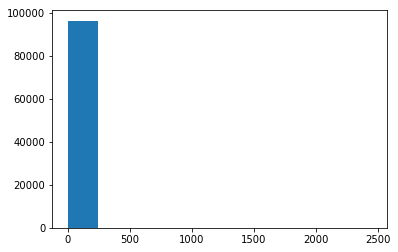

In [164]:
expected_donation_gb = pred_amount * pred_response_prob_gb
plt.hist(expected_donation_gb)
plt.show()

In [165]:
actual_donation = dtst['TARGET_D']

In [166]:
cost_per_mail = 0.68
idx = expected_donation_gb > cost_per_mail
print('Total net donation: {:.2f}'.format(np.sum(actual_donation[idx] - cost_per_mail)))

Total net donation: 14058.99


In [167]:
print('Total net donation (mail every one): {:.2f}'.format(np.sum(actual_donation - cost_per_mail)))

Total net donation (mail every one): 10560.08


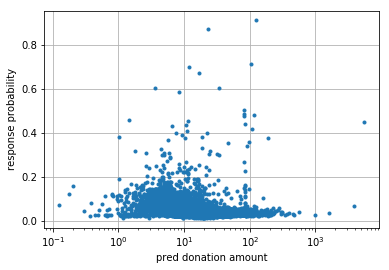

In [168]:
plt.plot(pred_amount, pred_response_prob_gb, '.')
plt.xlabel('pred donation amount')
plt.ylabel('response probability')
plt.xscale('log')
plt.grid()
plt.show()